In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('fraud_raw_data_v2.csv')


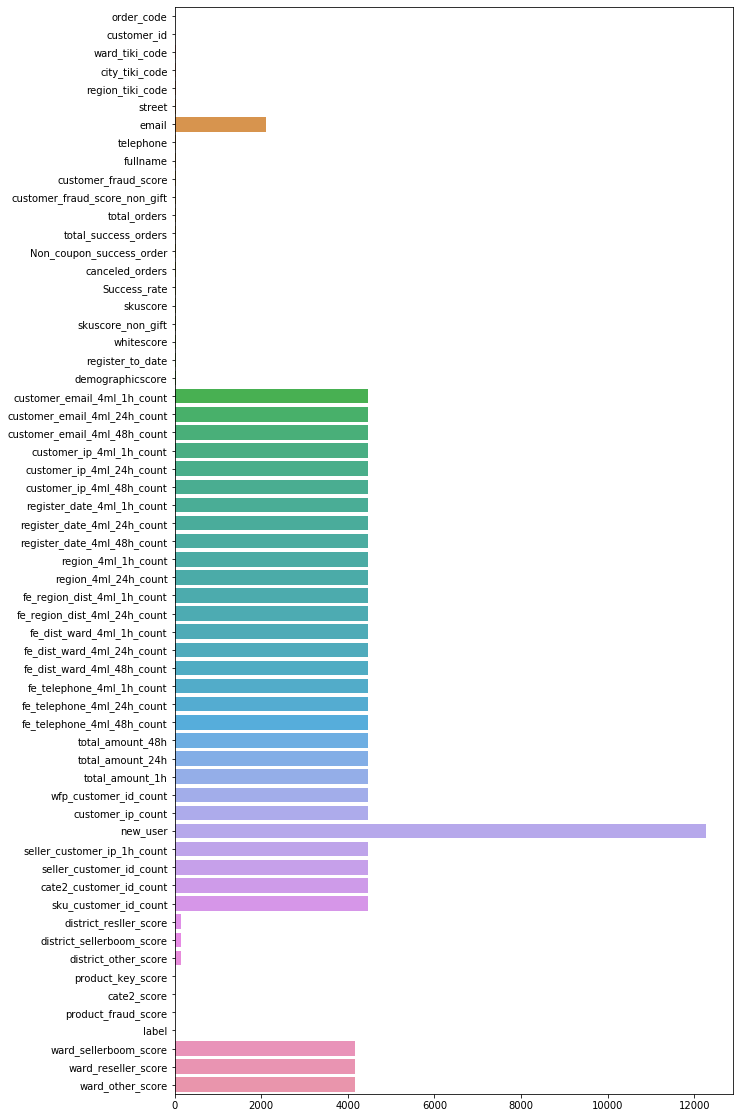

In [25]:
missing = df.isnull().sum()
fig = plt.figure(figsize=(10, 20))
sns.barplot(x=missing.values, y=missing.index)
plt.show()

In [26]:
df['label'].value_counts()

0    16384
1     1642
Name: label, dtype: int64

In [50]:
df3 = df.drop(columns=['ward_tiki_code', 'region_tiki_code', 'city_tiki_code'
                       , 'email', 'street', 'customer_id', 'telephone', 'fullname'])
df3.fillna(0, inplace=True)

In [55]:
df3

,order_code,customer_fraud_score,customer_fraud_score_non_gift,total_orders,total_success_orders,Non_coupon_success_order,canceled_orders,Success_rate,skuscore,skuscore_non_gift,...,district_resller_score,district_sellerboom_score,district_other_score,product_key_score,cate2_score,product_fraud_score,label,ward_sellerboom_score,ward_reseller_score,ward_other_score
0,513300790,0.499076,0.498739,54.0,47.0,28.0,7.0,0.870370,0.656566,0.657407,...,30.0,12.0,4.0,0.4,0.5,0.9,1,0.0,2.0,0.0
1,475524191,0.646759,0.648569,34.0,31.0,0.0,3.0,0.911765,0.883102,0.878577,...,24.0,6.0,3.0,0.1,0.5,0.5,0,1.0,2.0,3.0
2,496200774,1.000000,1.000000,6.0,3.0,0.0,3.0,0.500000,0.000000,0.000000,...,48.0,4.0,0.0,0.4,0.5,0.9,1,1.0,4.0,0.0
3,346851726,0.724660,0.756718,12.0,11.0,0.0,1.0,0.916667,0.688349,0.608205,...,15.0,7.0,0.0,0.0,0.2,0.2,1,1.0,15.0,0.0
4,281687320,0.527505,0.524825,128.0,122.0,78.0,6.0,0.953125,0.541893,0.548594,...,39.0,3.0,2.0,0.0,0.5,0.5,0,0.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18021,830501615,0.542145,0.541616,253.0,232.0,63.0,21.0,0.916996,0.873085,0.874409,...,25.0,6.0,3.0,0.0,0.1,0.1,0,1.0,3.0,3.0
18022,693947266,0.506667,0.506667,9.0,5.0,2.0,4.0,0.555556,0.500000,0.500000,...,79.0,3.0,7.0,0.5,0.5,1.0,0,0.0,6.0,1.0
18023,647526669,0.624266,0.622082,44.0,41.0,35.0,3.0,0.931818,0.085676,0.091136,...,20.0,4.0,1.0,0.0,0.0,0.0,0,4.0,20.0,0.0
18024,760821244,0.894518,0.886168,18.0,14.0,0.0,4.0,0.777778,0.263705,0.284580,...,1049.0,181.0,9.0,0.2,0.5,0.7,1,22.0,289.0,5.0


In [65]:
from imblearn.over_sampling import SMOTE

sp = SMOTE(random_state=30)
X, y = sp.fit_resample(df3.drop(columns=['label']), df3['label'])

In [66]:
y.value_counts()

1    16384
0    16384
Name: label, dtype: int64

In [70]:
import numpy as np
X = np.random.rand(5,3)
y = np.random.rand(5)

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
import pickle
pickle.dump(model, open('test_model.sav', 'wb'))